# Lesson 1

## 概览

空间数据模型（几何对象）和python中的空间数据基础。

- Geometric对象和Shapely模块
- Point对象
- LineString对象
- Polygon对象
- Geometry集合

## 目标

- 了解python有哪些地理数据分析工具可用
- 使用conda安装python包
- 清楚有哪些geometric对象
- 清楚如何使用Shapely创建不同类型的geometries
- 清楚如何读取文件坐标并基于此创建Points

## Shapely 和 geometric 对象

### 空间数据模型

![SpatialDataModel](pictures/SpatialDataModel.png)

Shapely中可用的基本几何对象，如上图所示。

最基础的就是Points，Lines和Polygons，是矢量数据的基本元素。Shapely模块可以用来进行几何运算，比如：

- 从点集合构建Line和Polygon
- 计算几何元素的面积长度边界等
- Union，Difference，Distance等几何运算
- 几何元素之间的空间查询，比如Intersects，Touches，Crosses，Within等

几何对象由坐标tuples构建：

- Point可以是二维，可以是三维
- 一系列tuple的Ponit
- 可以形成环的一系列typle的Point

上述对象可以构成集合几何对象：

- MultiPoint: tuple的Point的list
- MultiLineString：LineString的list
- MultiPolygon：Polygon的list

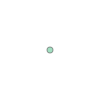

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates，可以看出都point可以是二维，也可以是三维。
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

point1

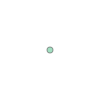

In [2]:
point3D

In [3]:
print(point1)
print(point3D)
print(type(point1))
print(point1.geom_type)
# Get the coordinates
point_coords = point1.coords
print(point_coords)
# What is the data type?
print(type(point_coords))

# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

print("xy:", xy, "\n")
print("x:", x, "\n")
print("y:", y)

# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>
Point
<class 'shapely.coords.CoordinateSequence'>
xy: (array('d', [2.2]), array('d', [4.2])) 

x: 2.2 

y: 4.2
Distance between the points is 29.72 decimal degrees


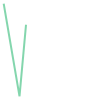

In [4]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

line

In [5]:
print("line: \n", line, "\n")
print("line2: \n", line2, "\n")
print("Object data type:", type(line))
print("Geometry type as text:", line.geom_type)


# Get x and y coordinates of the line
lxy = line.xy
print("\n line的xy坐标: \n ",lxy,'\n')

# Extract x coordinates
line_xcoords = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_ycoords = line.xy[1]

for i,j in zip(line_xcoords,line_ycoords):
    print('i和j',i,j)

print('line_x:\n', line_xcoords, '\n')

print('line_y:\n', line_ycoords)

# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", type(l_centroid))

line: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

line2: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

Object data type: <class 'shapely.geometry.linestring.LineString'>
Geometry type as text: LineString

 line的xy坐标: 
  (array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456])) 

i和j 2.2 4.2
i和j 7.2 -25.1
i和j 9.26 -2.456
line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456])
Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


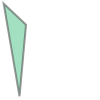

In [6]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
# It is also possible to produce the same outcome using a list of lists which contain the point coordinates.
# We can do this using the point objects we created before and a list comprehension:
# --> here, we pass a list of lists as input when creating the Polygon (the linst comprehension generates this list: [[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]):
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])
poly

In [7]:
print('poly:', poly)
print('poly2:', poly2)
print("Object data type:", type(poly))
print("Geometry type as text:", poly.geom_type)

# 遍历多边形的顶点
# bound是minx, miny, maxx, maxy
pxy_b = list(poly.bounds)
print("\n 外边的bound坐标: \n ",pxy_b,'\n')
# Get x and y coordinates of the polygon, 因为polygon和line不太一样，有外边和内边，如果是凸的多边形，那么取外边即可
pxy = list(poly.exterior.coords)
print("\n 外边的xy坐标: \n ",pxy,'\n')
pxy_i = list(poly.interiors)
print("\n 内边的xy坐标: \n ",pxy_i,'\n')

print(pxy[0][0],pxy[0][1])

poly: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
poly2: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Object data type: <class 'shapely.geometry.polygon.Polygon'>
Geometry type as text: Polygon

 外边的bound坐标: 
  [2.2, -25.1, 9.26, 4.2] 


 外边的xy坐标: 
  [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456), (2.2, 4.2)] 


 内边的xy坐标: 
  [] 

2.2 4.2


In [8]:
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
print(type(world_exterior))
print(type(world_exterior[0]))
# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes 因为有可能有多个内部的洞，因此是list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
print(type(hole))
print(type(hole[0]))
print(type(hole[0][0]))
# World without a hole
world = Polygon()
# 示范一个空polygon
world

<class 'list'>
<class 'tuple'>
<class 'list'>
<class 'list'>
<class 'tuple'>


POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


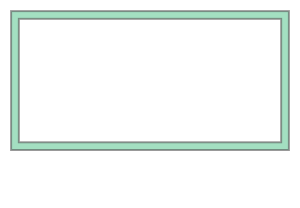

In [9]:
world = Polygon(shell=world_exterior)
print(world)
# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)
world_has_a_hole

(array('d', [-170.0, -170.0, 170.0, 170.0, -170.0]), array('d', [80.0, -80.0, -80.0, 80.0, 80.0]))
True
[(-170.0, 80.0), (-170.0, -80.0), (170.0, -80.0), (170.0, 80.0), (-170.0, 80.0)]


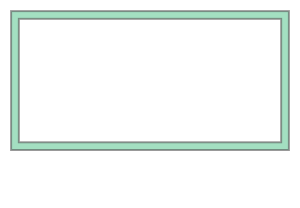

In [10]:
# 接下来简单练习一组构建polygon的方法：注意shell和holes的不同，holes是list里有list，因为可以有多个孔
boundary=world_has_a_hole.boundary
exts = boundary[0].xy
ints = boundary[1].xy
print(ints)
print(len(ints)>=1)
pxys_ext = []
pxys_int = []
for px_ext, py_ext in zip(exts[0], exts[1]):
    xy_ext = (px_ext,py_ext)
    pxys_ext.append(xy_ext)
for px_int, py_int in zip(ints[0], ints[1]):
    xy_int = (px_int,py_int)
    pxys_int.append(xy_int)
print(pxys_int)
polygon_to = Polygon(shell=pxys_ext, holes=[pxys_int])
polygon_to

In [11]:
print('world:', world)
print('world_has_a_hole:', world_has_a_hole)
print('type:', type(world_has_a_hole))

# Get the centroid of the Polygon
world_centroid = world_has_a_hole.centroid

# Get the area of the Polygon
world_area = world_has_a_hole.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world_has_a_hole.bounds
world_b = world_has_a_hole.boundary

# Get the exterior of the Polygon
world_ext = world_has_a_hole.exterior
world_ext_coords = world_has_a_hole.exterior.coords
world_int = world_has_a_hole.interiors
# Get the length of the exterior
world_ext_length = world_ext.length

# Print the outputs
print("Poly centroid: ", world_centroid)
print(world_centroid.x)
print(world_centroid.y)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Boundary: ", world_b)
print("Poly Boundary number: ", len(world_b))
print("Poly Exterior: ", world_ext)
print("Poly Exterior coords: ", world_ext_coords)
print("Poly Exterior: ", world_ext.xy)
print("Poly Exterior x: ", world_ext.xy[0])
print("Poly Exterior y: ", world_ext.xy[1])
print("Poly Exterior Length: ", world_ext_length)
print("Poly Interior: ", list(world_int))

# 检测下world_ext.xy[0]的数组能否直接初始化dataframe，后面有些批量操作，这样比较好
import pandas as pd
import numpy as np
df = pd.DataFrame({'x': world_ext.xy[0], 'y': world_ext.xy[1]})
print(type(df['x']))
arr_x=df['x'].values
print(arr_x)
arr_y=df['y'].values
print(arr_y)
arr= np.stack((arr_x,arr_y),0).T
print( arr)
world = Polygon(shell=arr)
print(world)

# 对于有hole的polygon，使用boundary是会得到multilinestring的，因此如果是想使用所有边界，最好是用boundary，而不要主动用extorior，而把内部边界给忽略了
# print("Poly Boundary: ", world_b.xy)
# 输出polygon边界所有的linestring
print("Poly Boundary 1: ", world_b[0].xy)
print("Poly Boundary 2: ", world_b[1].xy)

world: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
world_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
type: <class 'shapely.geometry.polygon.Polygon'>
Poly centroid:  POINT (-0 -0)
-0.0
-0.0
Poly Area:  10400.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Boundary:  MULTILINESTRING ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
Poly Boundary number:  2
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior coords:  <shapely.coords.CoordinateSequence object at 0x000001A854EAF280>
Poly Exterior:  (array('d', [-180.0, -180.0, 180.0, 180.0, -180.0]), array('d', [90.0, -90.0, -90.0, 90.0, 90.0]))
Poly Exterior x:  array('d', [-180.0, -180.0, 180.0, 180.0, -180.0])
Poly Exterior y:  array('d', [90.0, -90.0, -90.0, 90.0, 90.0])
Poly Exterior Length:  1080.0
Poly Interior:  [<shapely.geometry.polygon.LinearRing object at 0x00

In [12]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds
world_b = world.boundary

# Get the exterior of the Polygon
world_ext = world.exterior
world_int = world.interiors
# Get the length of the exterior
world_ext_length = world_ext.length

# Print the outputs
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", type(world_bbox),':',world_bbox)
print("Poly Boundary: ", world_b)
print("Poly Boundary: ", world_b.xy)
print("Poly Boundary x: ", world_b.xy[0])
print("Poly Boundary y: ", world_b.xy[1])
print("Poly Boundary x[0]: ", world_b.xy[0][0])
print("Poly Exterior: ", world_ext)
print("Poly Exterior: ", world_ext.xy)
print("Poly Exterior Length: ", world_ext_length)
print("Poly Interior: ", world_int)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  <class 'tuple'> : (-180.0, -90.0, 180.0, 90.0)
Poly Boundary:  LINESTRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Boundary:  (array('d', [-180.0, -180.0, 180.0, 180.0, -180.0]), array('d', [90.0, -90.0, -90.0, 90.0, 90.0]))
Poly Boundary x:  array('d', [-180.0, -180.0, 180.0, 180.0, -180.0])
Poly Boundary y:  array('d', [90.0, -90.0, -90.0, 90.0, 90.0])
Poly Boundary x[0]:  -180.0
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior:  (array('d', [-180.0, -180.0, 180.0, 180.0, -180.0]), array('d', [90.0, -90.0, -90.0, 90.0, 90.0]))
Poly Exterior Length:  1080.0
Poly Interior:  <shapely.geometry.polygon.InteriorRingSequence object at 0x000001A854EAFFD0>


有些情况下需要存储多个lines或polygons到一个feature里，比如Shapefile的一行代表不止一条line或一个polygon对象，这时候就需要geometry collections。

In [13]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

#  访问multi_line中的各个LineString
print('第一条线',multi_line[0])
print('第一条线的各点坐标',multi_line[0].xy)

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print outputs
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

第一条线 LINESTRING (2.2 4.2, 7.2 -25.1)
第一条线的各点坐标 (array('d', [2.2, 7.2]), array('d', [4.2, -25.1]))
MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


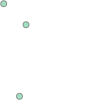

In [14]:
multi_point

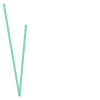

In [15]:
multi_line

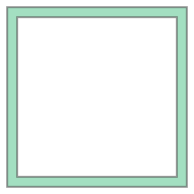

In [16]:
west_poly

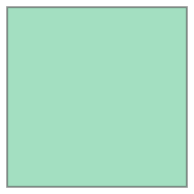

In [17]:
east_poly_box

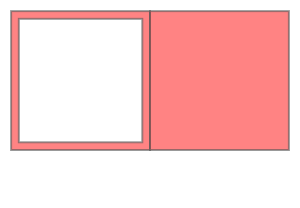

In [18]:
multi_poly

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))


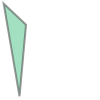

In [19]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull
print("Convex hull of the points: ", convex)
convex

In [20]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

# Print output:
print("Number of lines in MultiLineString:", lines_count)

# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area
# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

# Print outputs:
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)
valid = multi_poly.is_valid
print("Is polygon valid?: ", valid)

Number of lines in MultiLineString: 2
Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0
Is polygon valid?:  False


一个MultiPolygon内的每个polygon互相之间没有交集，则认为其是valid的